In [1]:
import numpy as np

folder = './results/'
results_files = [
    'L1_sum_30_epochs',
    'L2_neuronlevel_30_epochs',
    'L2_layerlevel_30_epochs',
    'nopenalty_30_epochs',
    'weightdecay_30_epochs'
]
    
results = {file:np.loadtxt(folder + file + '.txt') for file in results_files}

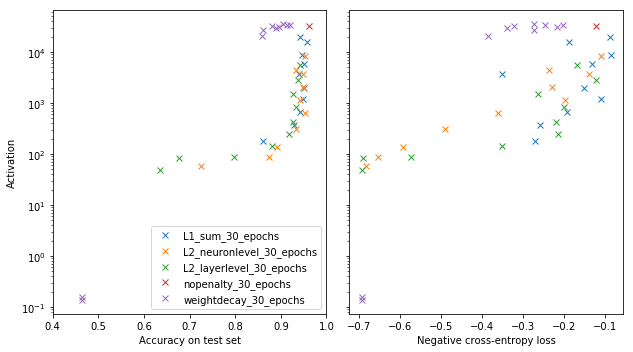

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(9, 5), sharey=True)
for (key, data) in results.items():
    penalty, activation, test_acc, loss = data.T
    ax[0].plot(test_acc, activation, 'x', label=key)
    ax[1].plot(-loss, activation, 'x', label=key)

ax[0].set_xlabel("Accuracy on test set")
ax[1].set_xlabel("Negative cross-entropy loss")
ax[0].set_ylabel("Activation")
ax[0].set_xlim([0.4, 1])
ax[0].legend()
plt.tight_layout()
plt.yscale('log')

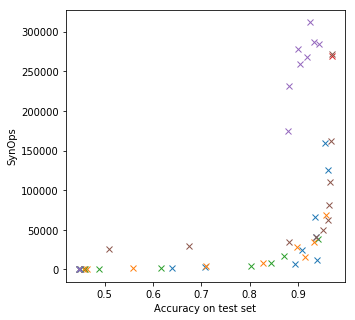

In [25]:
file = np.loadtxt('spk_results.txt', dtype=str)

modelsym = {'L1_sum': 'C0', 'L2_neuronlevel': 'C1',
            'L2_layerlevel': 'C2', 'nopenalty': "C3",
            'weightdecay': 'C4', 'nopen_thres': 'C5'}

plt.figure(figsize=(5,5))
for (name, acc, synops) in file:
    name = name.strip('models/').split('_30_epochs')[0]
    acc = float(acc)
    synops = float(synops)
    
    plt.plot(acc, synops, 'x', label=name, c=modelsym[name])
    
plt.xlabel("Accuracy on test set")
plt.ylabel("SynOps");
# plt.yscale('log')